In [13]:

import numpy as np 
import pandas as pd 




# Data Science Salaries EDA & Predection

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import mean_squared_error

# Data Importing

In [15]:
df = pd.read_csv('data/ds_salaries.csv', index_col = 0)

About Dataset

work_year - The year the salary was paid.

experience_level - The experience level in the job during the year with the following possible values:
EN = Entry-level / Junior
MI = Mid-level / Intermediate
SE = Senior-level / Expert
EX = Executive-level / Director

employment_type - The type of employement for the role:
PT = Part-time
FT = Full-time
CT = Contract
FL = Freelance

job_title - The role worked in during the year.

salary - The total gross salary amount paid.

salary_currency - The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code(Alpha-2 code).

remote_ratio - The overall amount of work done remotely, possible values are as follows:
0 = No remote work (less than 20%)
50 = Partially remote
100 = Fully remote (more than 80%)

company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code(Alpha-2 code).

company_size - The average number of people that worked for the company during the year:
S = less than 50 employees (small)
M = 50 to 250 employees (medium)
L = more than 250 employees (large)

In [16]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [17]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [18]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
478,2022,MI,FT,Data Scientist,200000,USD,200000,US,100,US,M
436,2022,MI,FT,Data Engineer,60000,EUR,65949,ES,100,ES,M
61,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M
255,2021,SE,FT,Big Data Architect,125000,CAD,99703,CA,50,CA,M
486,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


# Data Wrangling/cleaning

In [20]:
df.shape

(607, 11)

In [21]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


# Finding the Missing values from Data

In [22]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [23]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [24]:
for col in df.columns:
    print(col)
    print("===================")
    print("Total Number of Variables in the column\n", df[col].value_counts())

work_year
Total Number of Variables in the column
 work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64
experience_level
Total Number of Variables in the column
 experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64
employment_type
Total Number of Variables in the column
 employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64
job_title
Total Number of Variables in the column
 job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Sci

# Unilateral Elements

 We are Checking the Pattern of the unilateral elements

In [25]:
df['work_year'].value_counts()

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

C:\Users\ahmed\AppData\Local\Temp\ipykernel_11128\1456632594.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['work_year'])


<Axes: xlabel='work_year', ylabel='Density'>

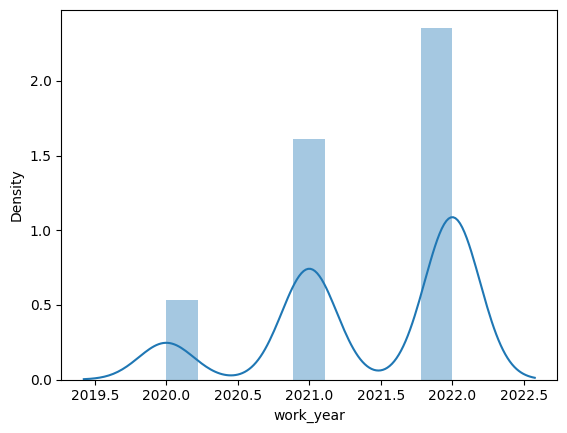

In [26]:
sns.distplot(df['work_year'])

In [27]:
k = df['experience_level'].value_counts()

In [28]:
k.to_frame().reset_index()

,experience_level,count
0,SE,280
1,MI,213
2,EN,88
3,EX,26


In [29]:
df['salary'].value_counts()

salary
100000     18
80000      18
120000     15
60000      15
150000     14
           ..
256000      1
39600       1
1335000     1
52500       1
129000      1
Name: count, Length: 272, dtype: int64

<Axes: ylabel='salary'>

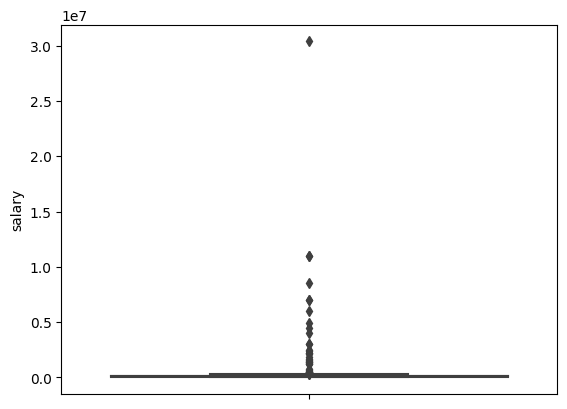

In [30]:
sns.boxplot(y="salary", data=df)

<Axes: ylabel='salary_in_usd'>

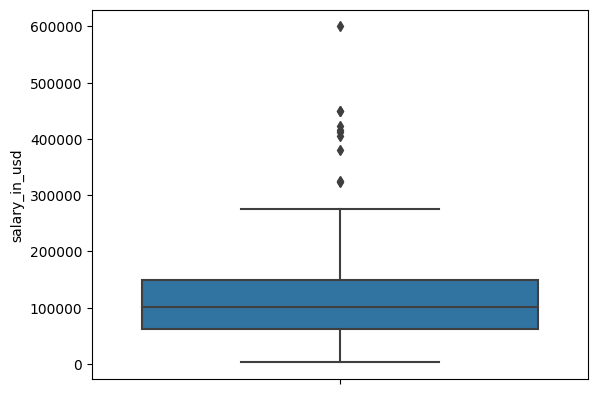

In [31]:
sns.boxplot(y="salary_in_usd", data=df)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_11128\1429271892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary_in_usd'])


<Axes: xlabel='salary_in_usd', ylabel='Density'>

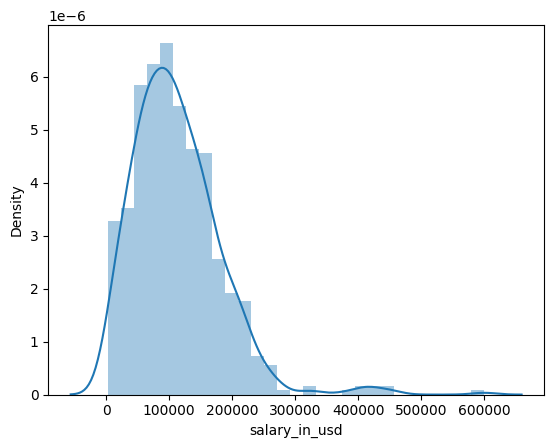

In [32]:
sns.distplot(df['salary_in_usd'])

C:\Users\ahmed\AppData\Local\Temp\ipykernel_11128\1663339336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['remote_ratio'])


<Axes: xlabel='remote_ratio', ylabel='Density'>

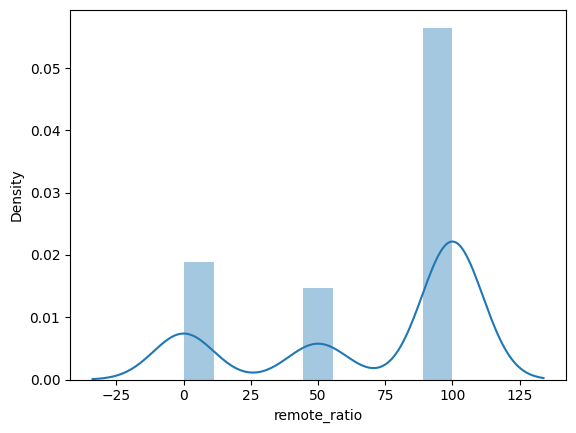

In [33]:
sns.distplot(df['remote_ratio'])

# Bilateral and Multilateral Elements

We are Observing the patten of the different Bilateral and Multilateral Element and their relations

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

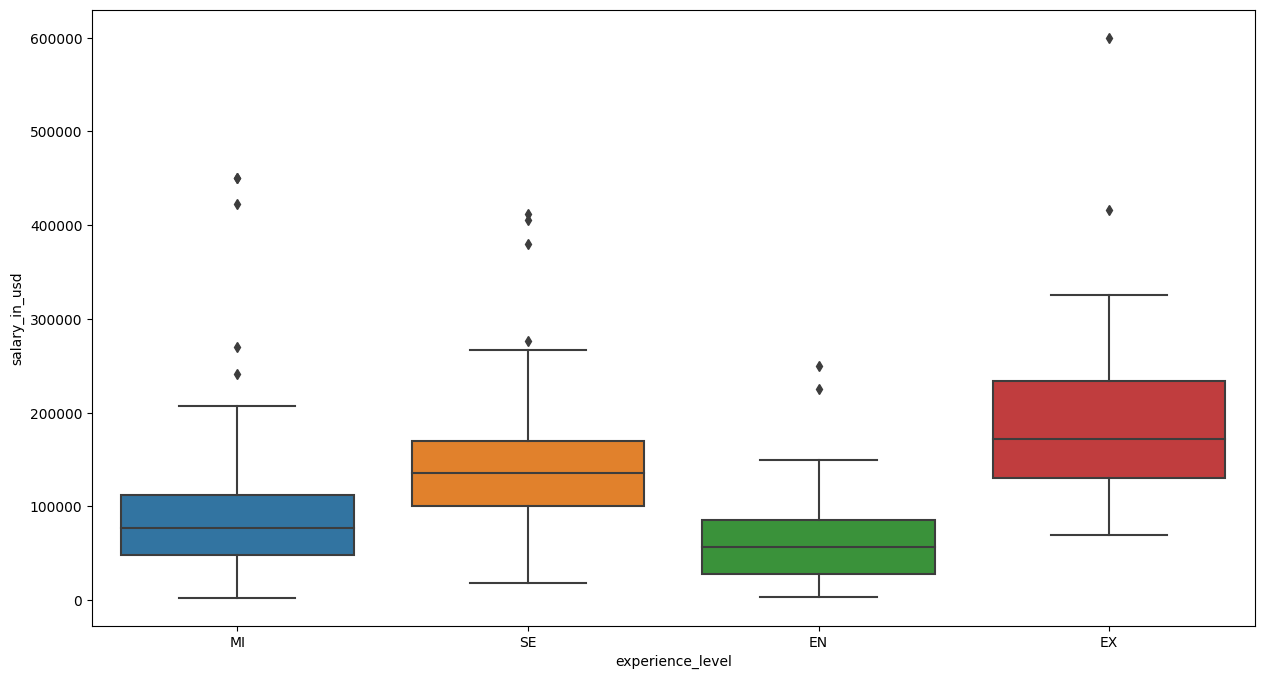

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot(x="experience_level", y="salary_in_usd", data=df)

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

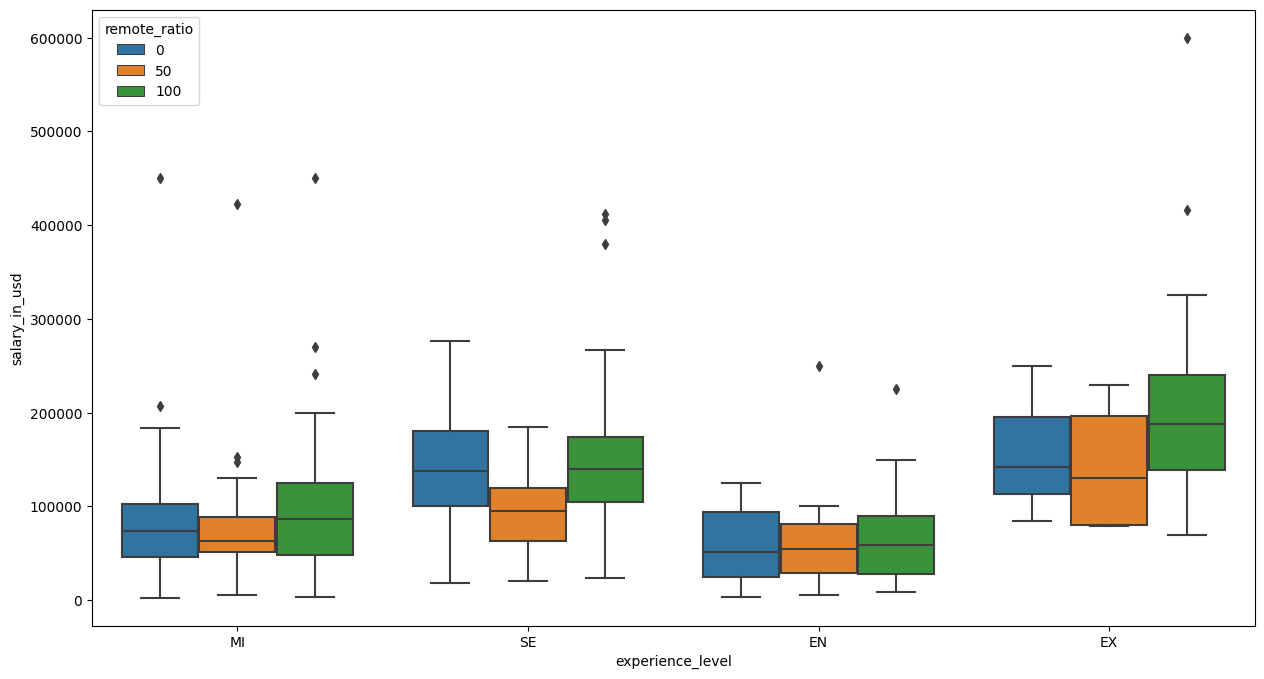

In [35]:
plt.figure(figsize=(15,8))
sns.boxplot(x="experience_level", y="salary_in_usd",hue='remote_ratio', data=df)

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

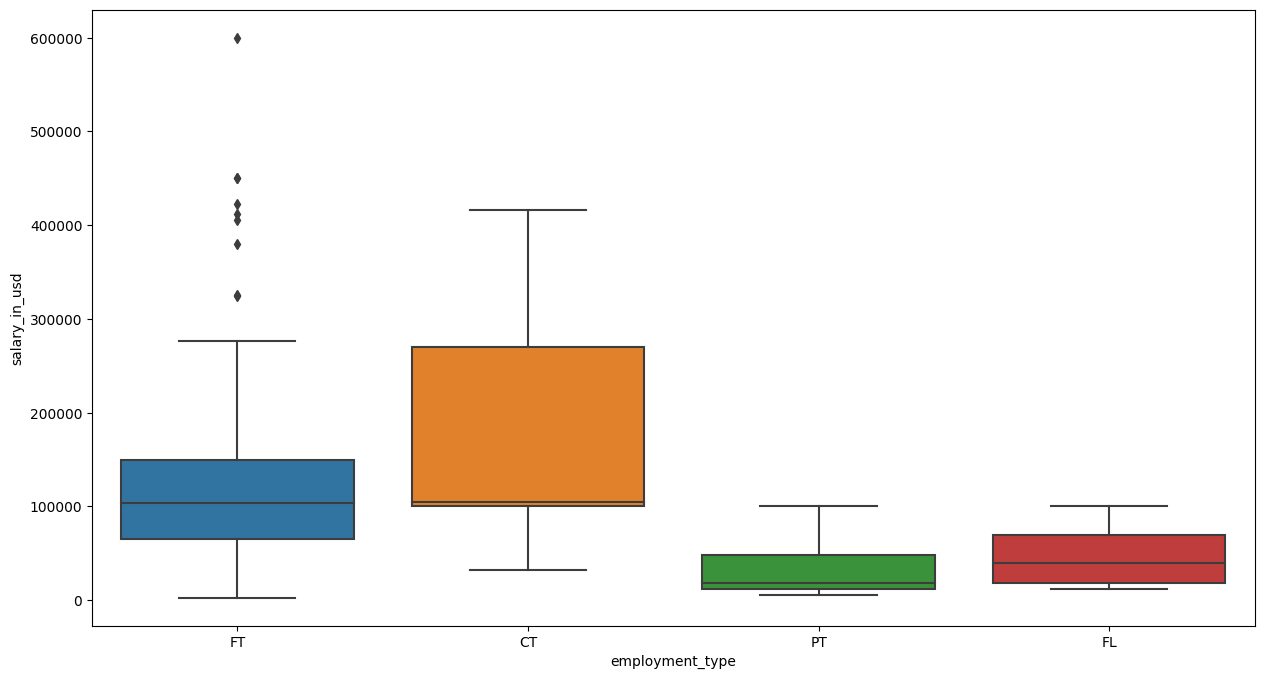

In [36]:
plt.figure(figsize=(15,8))
sns.boxplot(x="employment_type", y="salary_in_usd", data=df)

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

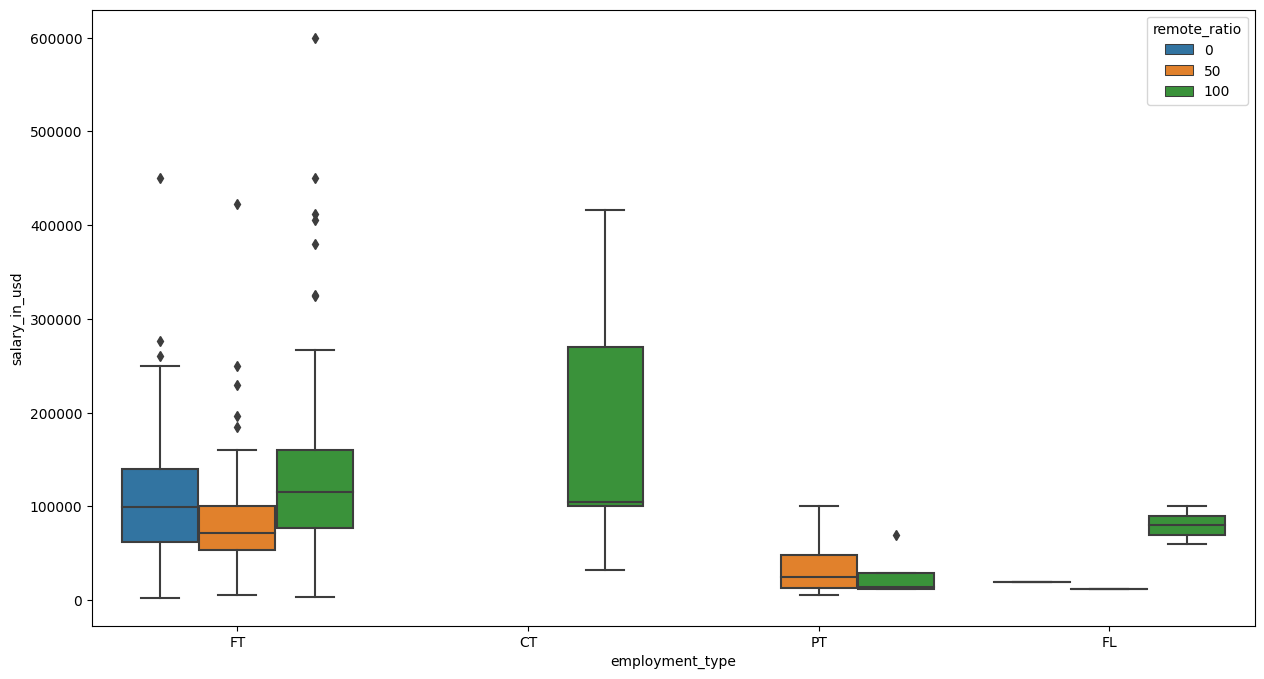

In [37]:
plt.figure(figsize=(15,8))
sns.boxplot(x="employment_type", y="salary_in_usd",hue = "remote_ratio", data=df)

We are observing top 10 Jobs in the list

In [38]:
first_10_job_titles =  df['job_title'].value_counts()[:10].keys()
df_filtered_job_titles = df[df['job_title'].isin(first_10_job_titles)]
df_filtered_job_titles['job_title'].value_counts()

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Principal Data Scientist        7
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(job_title, 0, 'Data Scientist'),
  Text(job_title, 0, 'Machine Learning Scientist'),
  Text(job_title, 0, 'Big Data Engineer'),
  Text(job_title, 0, 'Machine Learning Engineer'),
  Text(job_title, 0, 'Data Analyst'),
  Text(job_title, 0, 'Data Engineer'),
  Text(job_title, 0, 'Research Scientist'),
  Text(job_title, 0, 'Principal Data Scientist'),
  Text(job_title, 0, 'Data Science Manager'),
  Text(job_title, 0, 'Data Architect')])

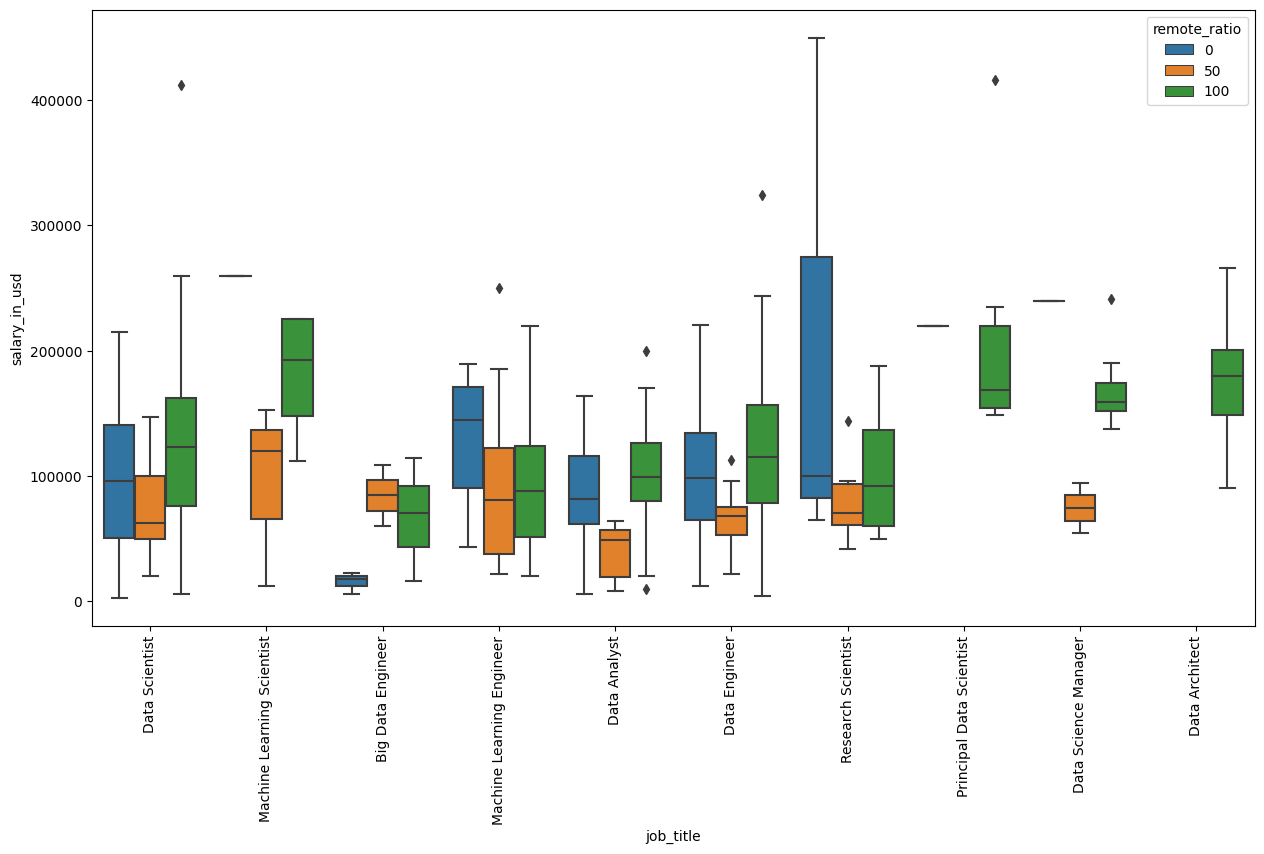

In [39]:
plt.figure(figsize=(15,8))
sns.boxplot(x="job_title", y="salary_in_usd",hue = "remote_ratio" , data=df_filtered_job_titles)
plt.xticks(x ="job_title" ,rotation ='vertical')

<Axes: xlabel='company_location', ylabel='salary_in_usd'>

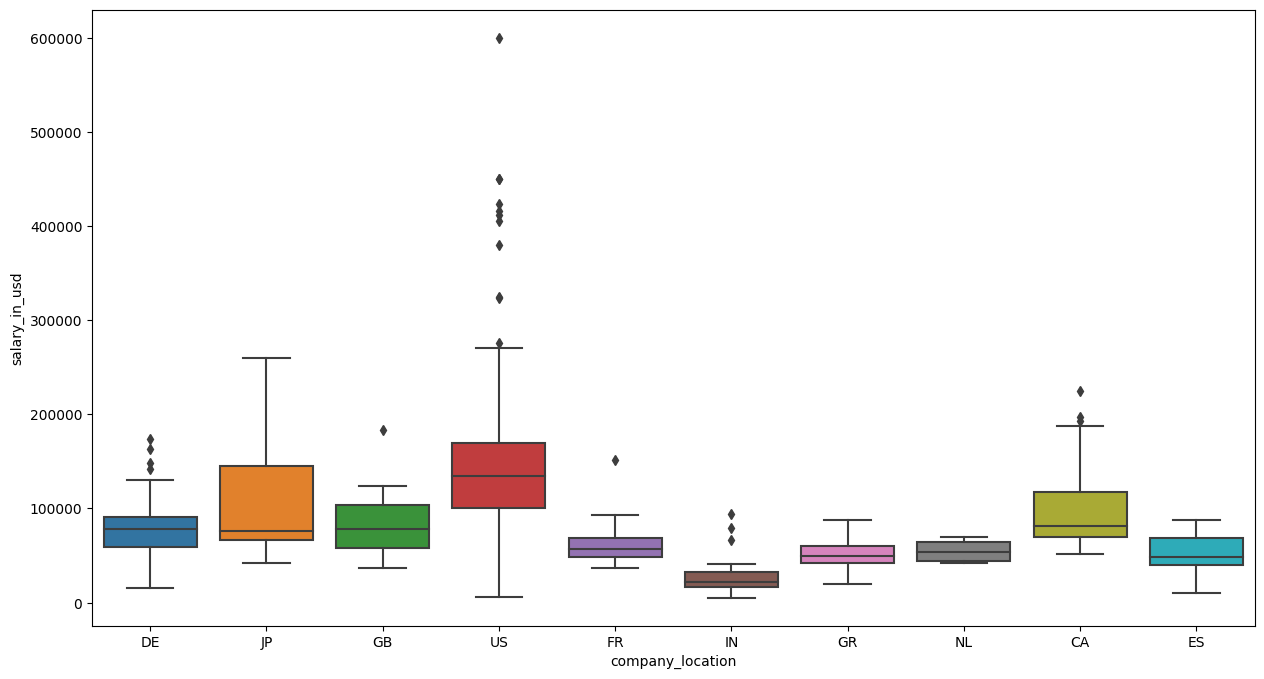

In [40]:
first_10_company_location =  df['company_location'].value_counts()[:10].keys()
df_filtered_company_location = df[df['company_location'].isin(first_10_company_location)]

plt.figure(figsize=(15,8))
sns.boxplot(x="company_location", y="salary_in_usd", data=df_filtered_company_location)

<Figure size 1500x800 with 0 Axes>

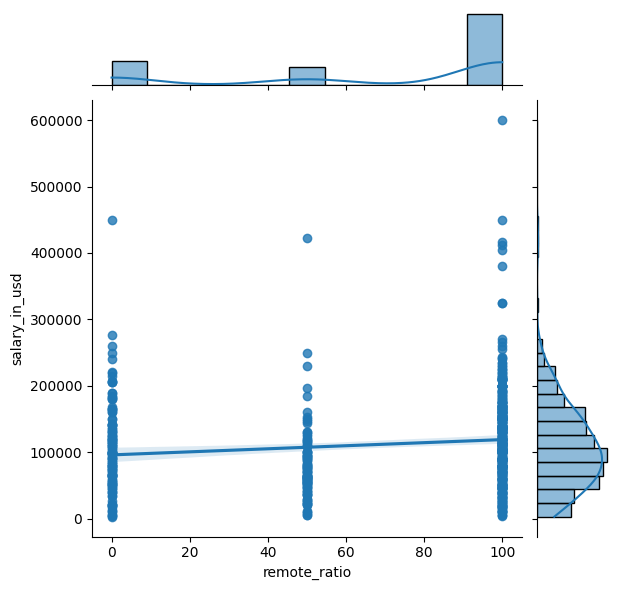

In [41]:
plt.figure(figsize=(15,8))
sns.jointplot(x="remote_ratio", y="salary_in_usd", data=df, kind="reg")

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

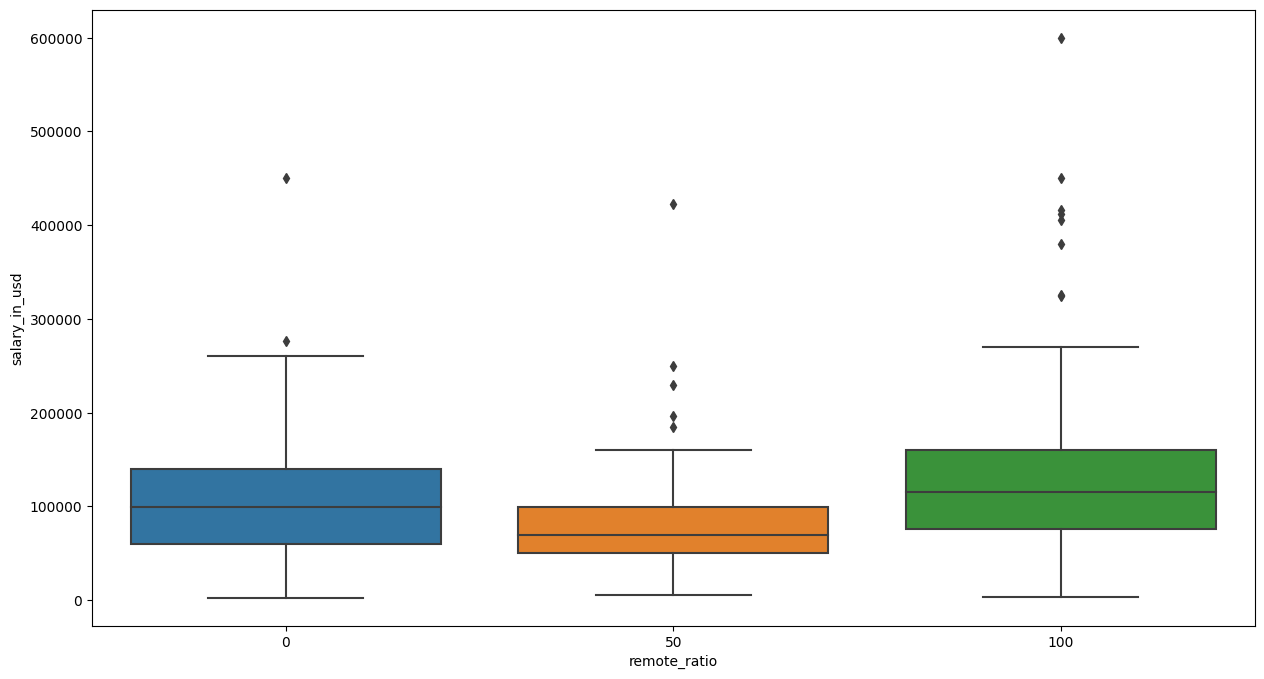

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(x="remote_ratio", y="salary_in_usd", data=df)

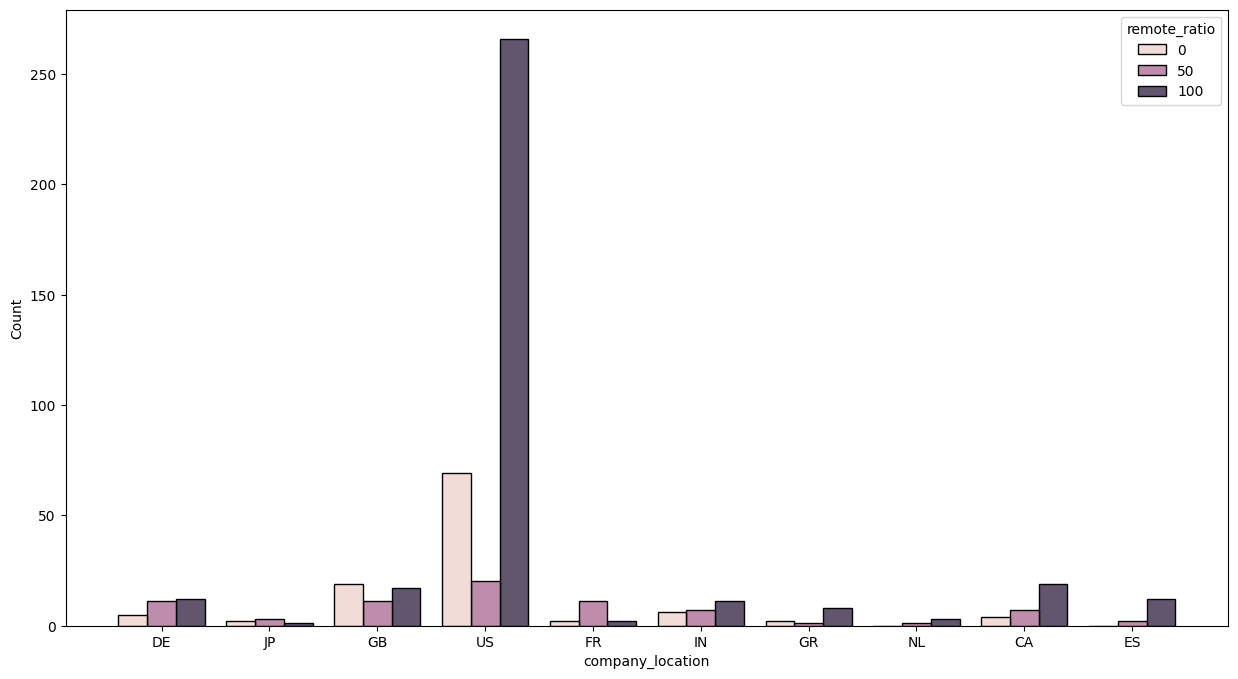

In [43]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x="company_location", hue="remote_ratio", data=df_filtered_company_location ,multiple="dodge", shrink=.8)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


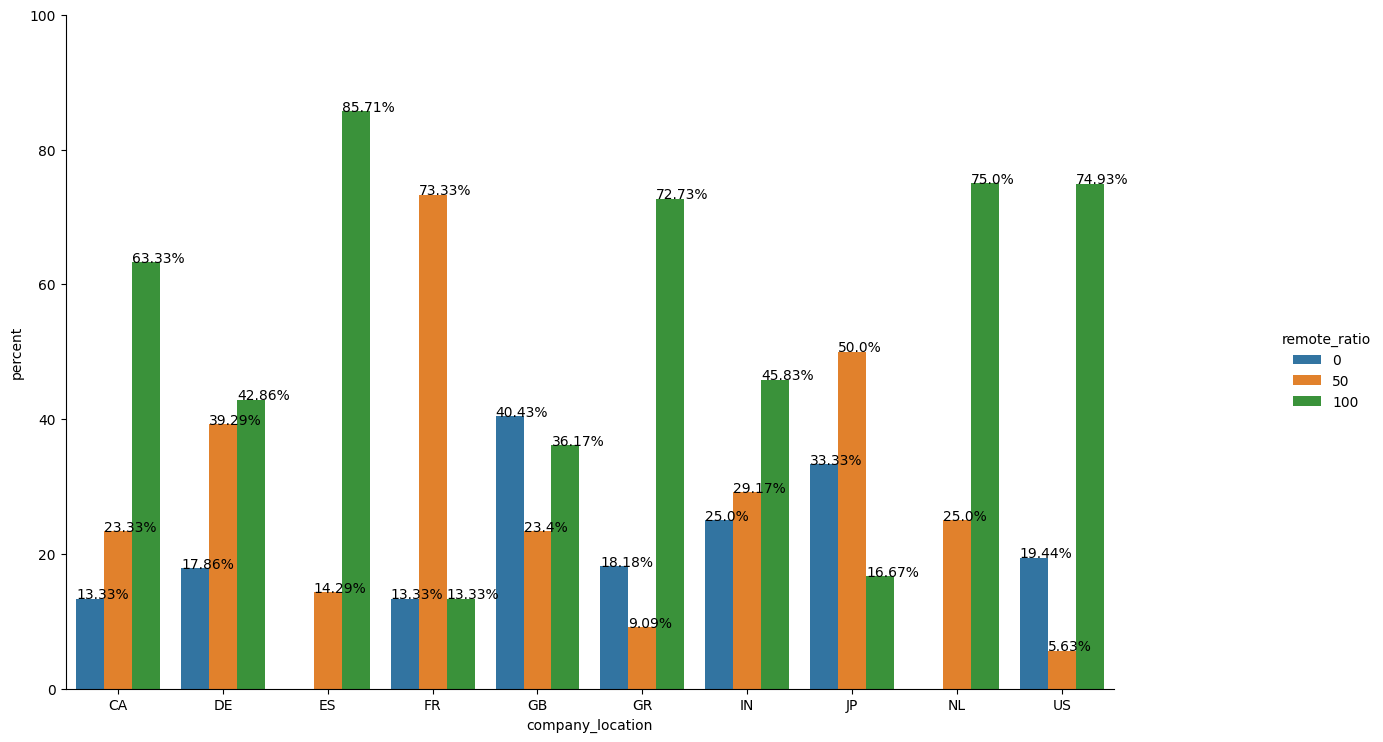

In [44]:
x,y = 'company_location', 'remote_ratio'

g = (df_filtered_company_location
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
g.fig.set_size_inches(15,8)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [45]:
from sklearn.preprocessing import OneHotEncoder
def category_to_column(df, column, prefix=''):
    df_copy = df.copy()
    oe_style = OneHotEncoder()
    oe_results = oe_style.fit_transform(df_copy[[column]])
    name_columns = prefix + oe_style.categories_[0]
    temp = pd.DataFrame(oe_results.toarray(), columns=name_columns, index=df_copy.index)
    df_copy = pd.concat([df_copy, temp], axis=1)
    return df_copy

In [46]:
columns_category = ['experience_level', 'employment_type', 'salary_currency', 'company_size']
df_v2 = df.copy()
for column in columns_category:
    df_v2 = category_to_column(df_v2, column)
df_v2 = df_v2.drop(columns=columns_category)
df_v2.head()

,work_year,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,EN,EX,MI,...,INR,JPY,MXN,PLN,SGD,TRY,USD,L,M,S
0,2020,Data Scientist,70000,79833,DE,0,DE,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,Machine Learning Scientist,260000,260000,JP,0,JP,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2020,Big Data Engineer,85000,109024,GB,50,GB,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020,Product Data Analyst,20000,20000,HN,0,HN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2020,Machine Learning Engineer,150000,150000,US,50,US,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [47]:
df_v3 = df_v2.drop(columns=['job_title', 'salary', 'employee_residence', 'company_location'])
df_v3.head()

,work_year,salary_in_usd,remote_ratio,EN,EX,MI,SE,CT,FL,FT,...,INR,JPY,MXN,PLN,SGD,TRY,USD,L,M,S
0,2020,79833,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,260000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2020,109024,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020,20000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2020,150000,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


<Axes: >

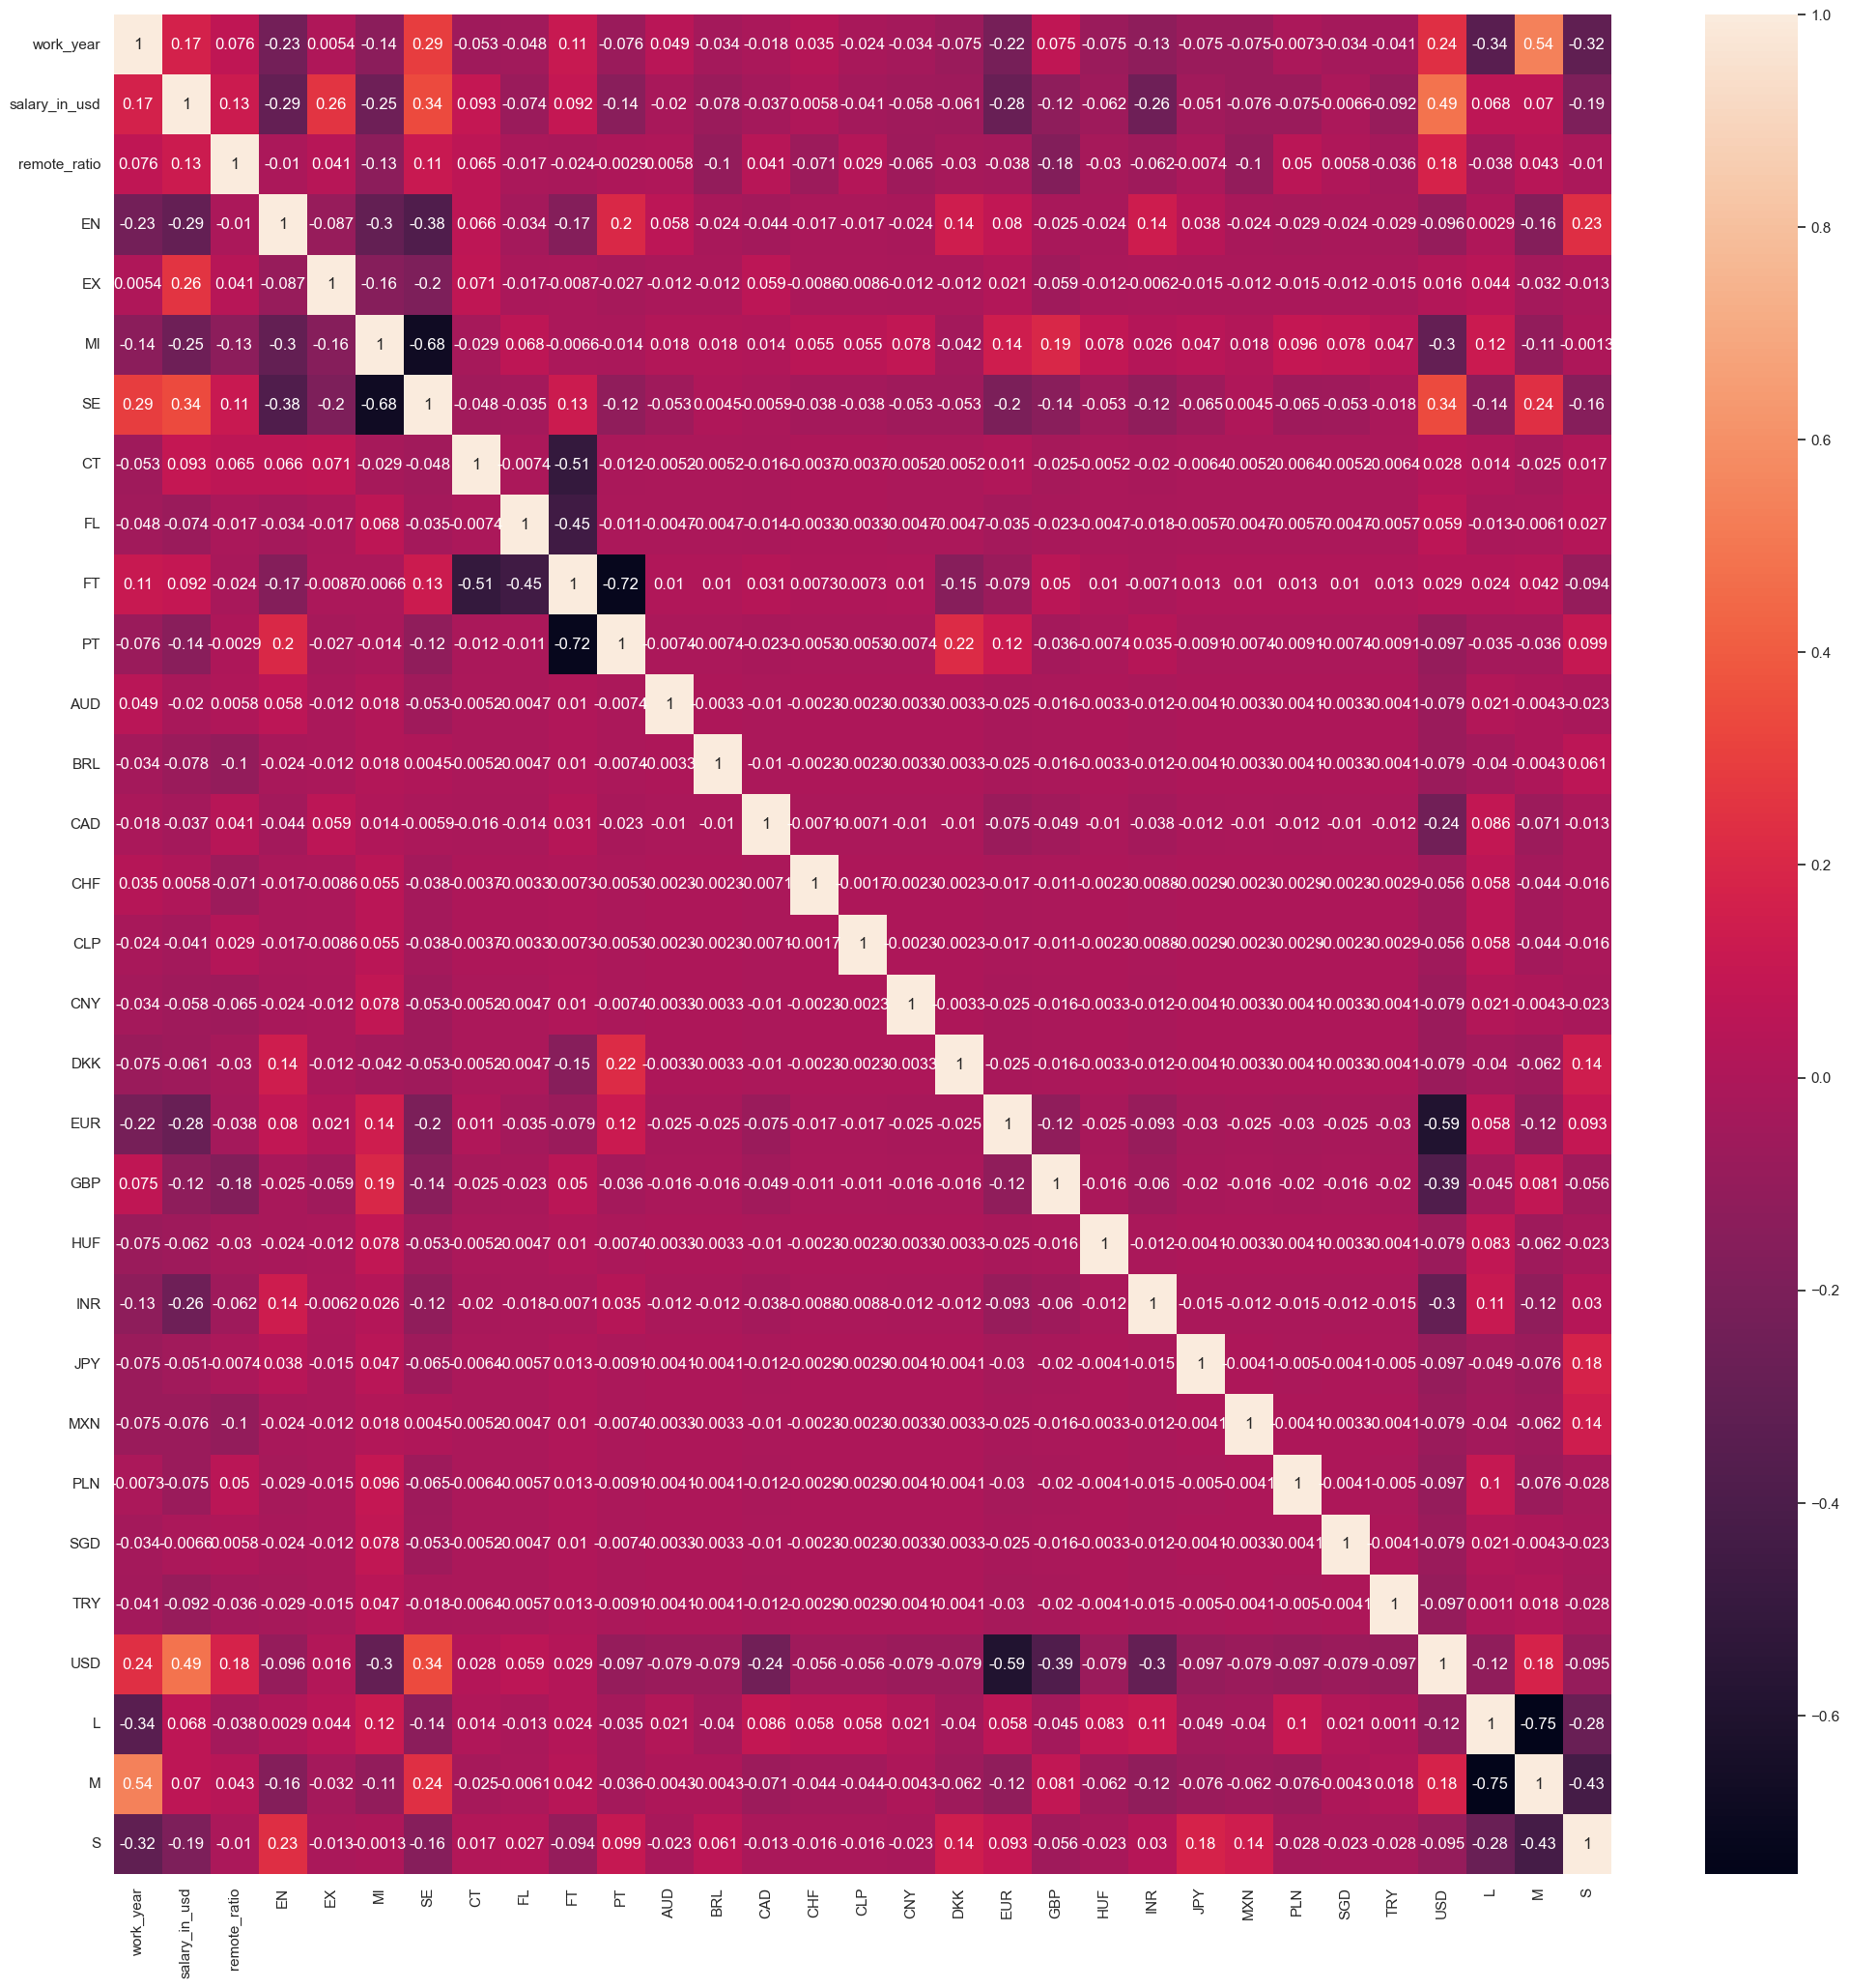

In [49]:
corr = df_v3.corr()
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True)

# Standadization

In [50]:
from sklearn.preprocessing import StandardScaler

feature = df_v3.drop(columns=['salary_in_usd'])
target = df_v3['salary_in_usd']

scaler = StandardScaler()
scaler.fit(feature)
feature_scaled = scaler.transform(feature)
feature_scaled = pd.DataFrame(feature_scaled, columns=feature.columns, index=feature.index)
feature_scaled.head()

,work_year,remote_ratio,EN,EX,MI,SE,CT,FL,FT,PT,...,INR,JPY,MXN,PLN,SGD,TRY,USD,L,M,S
0,-2.032024,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,-1.379966,1.437239,-1.077099,-0.397991
1,-2.032024,-1.743615,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,0.724656,-0.695778,-1.077099,2.512619
2,-2.032024,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,-1.379966,-0.695778,0.928420,-0.397991
3,-2.032024,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,0.724656,-0.695778,-1.077099,2.512619
4,-2.032024,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,0.724656,1.437239,-1.077099,-0.397991


In [51]:
scaler_target = StandardScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))
target_scaled[0:10]

array([[-0.45790445],
       [ 2.08328151],
       [-0.04617667],
       [-1.30182581],
       [ 0.53177399],
       [-0.56838589],
       [ 1.09595854],
       [-1.07988971],
       [ 0.32020478],
       [ 0.17915864]])

# Train-Test Spliting

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_scaled , target_scaled, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Model Preparation¶


**Logistic_Regression**

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

0.3806317984705601

In [54]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

c:\Users\ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.38325981011167937

In [55]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

0.8189975495132173

In [56]:
from sklearn import linear_model
model = linear_model.ARDRegression()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

c:\Users\ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.38385572073770186

In [57]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='linear', input_dim=X_train.shape[1]),
     keras.layers.Dense(256 ,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False),
    keras.layers.Dense(1,  kernel_initializer='random_uniform', activation='linear', use_bias=False)
  ])
model.compile(loss='mean_squared_error', optimizer='adam')
result = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
16/16 [==============================] - 1s 14ms/step - loss: 0.9533 - val_loss: 0.4788
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7020 - val_loss: 0.3502
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6390 - val_loss: 0.3779
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6263 - val_loss: 0.3911
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6236 - val_loss: 0.4029
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6231 - val_loss: 0.3816
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6413 - val_loss: 0.4126
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6309 - val_loss: 0.3939
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6178 - val_loss: 0.3919
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6118 - val_loss: 0.3798
Epoch 11

Text(0, 0.5, 'Cost')

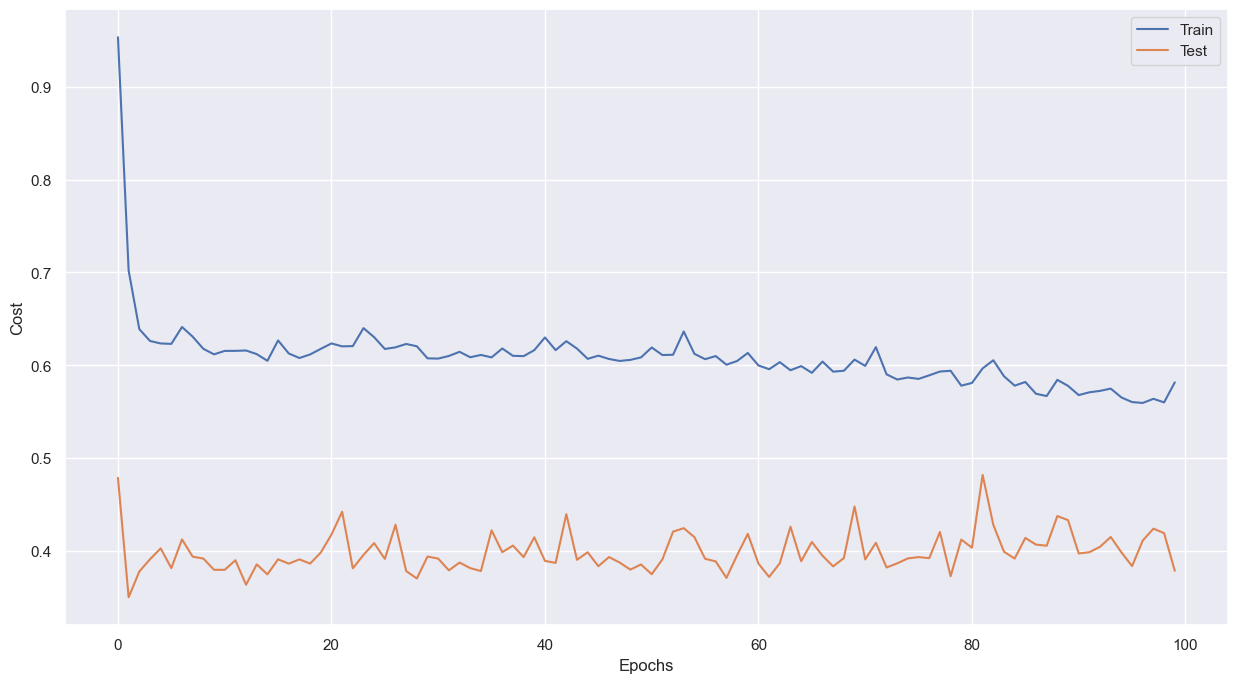

In [58]:
plt.figure(figsize=(15,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Cost')